<a href="https://colab.research.google.com/github/Lexx4nder/challenge2-data-science-LATAM/blob/main/Challenge_2_Data_Science_%7C_TELECOM_X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

👺**Extracción**:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
datos = pd.read_json('/content/TelecomX_Data.json') #importación de la API
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


🤖 **Transformación**

In [ ]:
datos = pd.json_normalize(datos.to_dict(orient='records'))  #normalizamos datos anidados
datos.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
datos.info()  #verificamos si era Data frame o si hay nulos
datos.columns #verificamos las columnas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

**Diccionario de Datos**




* *customerID:* número de identificación único de cada cliente

* *Churn:* si el cliente dejó o no la empresa

* *gender:* género (masculino y femenino)

* *SeniorCitizen:* información sobre si un cliente tiene o no una edad igual o mayor a 65 años

* *Partner:* si el cliente tiene o no una pareja

* *Dependents:* si el cliente tiene o no dependientes

* *tenure:* meses de contrato del cliente

* *PhoneService:* suscripción al servicio telefónico

* *MultipleLines:* suscripción a más de una línea telefónica

* *InternetService:* suscripción a un proveedor de internet

* *OnlineSecurity:* *texto en cursiva* suscripción adicional de seguridad en línea

* *OnlineBackup:* suscripción adicional de respaldo en línea

* *DeviceProtection:* suscripción adicional de protección del dispositivo

* *TechSupport:* suscripción adicional de soporte técnico, menor tiempo de espera

* *StreamingTV: *suscripción de televisión por cable

* *StreamingMovies:* suscripción de streaming de películas

* *Contract:* tipo de contrato

* *PaperlessBilling:* si el cliente prefiere recibir la factura en línea

* *PaymentMethod:* forma de pago

* *Charges.Monthly:* total de todos los servicios del cliente por mes

* *Charges.Total:* total gastado por el cliente




In [ ]:
#Revision de inconsistencias
columnas_revisar = [
    'Churn',
    'account.Contract',
    'account.PaymentMethod',
    'account.PaperlessBilling',
    'internet.InternetService',
    'internet.TechSupport',
    'customer.SeniorCitizen',
    'customer.Partner',
    'customer.Dependents'
]

for col in columnas_revisar:
    print(f"{col}: {datos[col].unique()}")

Churn: ['No' 'Yes' '']
account.Contract: ['One year' 'Month-to-month' 'Two year']
account.PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
account.PaperlessBilling: ['Yes' 'No']
internet.InternetService: ['DSL' 'Fiber optic' 'No']
internet.TechSupport: ['Yes' 'No' 'No internet service']
customer.SeniorCitizen: [0 1]
customer.Partner: ['Yes' 'No']
customer.Dependents: ['Yes' 'No']


In [ ]:
datos['Churn'].value_counts(dropna=False) # identificar cuantos valores vacíos hay en 'Churn'

,count
Churn,
No,5174
Yes,1869
,224


In [ ]:
datos = datos[datos['Churn'].isin(['Yes', 'No'])].copy()  #Eliminar filas vacías en la columna 'Churn'

In [ ]:
datos['account.Charges.Total'] = pd.to_numeric(datos['account.Charges.Total'], errors='coerce')
datos['account.Charges.Total'] = datos['account.Charges.Total'].fillna(0)
datos['account.Charges.Total'].dtype

dtype('float64')

In [ ]:
columnas_b = [
    'Churn',
    'customer.Partner',
    'customer.Dependents',
    'account.PaperlessBilling'
    ]
datos[columnas_b] = datos[columnas_b].replace({'Yes': True, 'No': False})
datos[columnas_b]

/tmp/ipython-input-1072791880.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos[columnas_b] = datos[columnas_b].replace({'Yes': True, 'No': False})


,Churn,customer.Partner,customer.Dependents,account.PaperlessBilling
0,False,True,True,True
1,False,False,False,False
2,True,False,False,True
3,True,True,False,True
4,True,True,False,True
...,...,...,...,...
7262,False,False,False,False
7263,True,True,False,True
7264,False,False,False,True
7265,False,True,True,False


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   bool   
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   bool   
 5   customer.Dependents        7043 non-null   bool   
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   object 
 1

In [ ]:
datos.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,False,Female,0,True,True,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,True,Mailed check,65.6,593.30
1,0003-MKNFE,False,Male,0,False,False,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,False,Mailed check,59.9,542.40
2,0004-TLHLJ,True,Male,0,False,False,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,True,Electronic check,73.9,280.85
3,0011-IGKFF,True,Male,1,True,False,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,True,Electronic check,98.0,1237.85
4,0013-EXCHZ,True,Female,1,True,False,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,True,Mailed check,83.9,267.40


**Corregir Columnas - agregar datos**

In [ ]:
datos['Cuentas.diarias'] = datos ['account.Charges.Monthly'] / 30
datos['Cuentas.Prom.Periodo'] = datos['account.Charges.Total'] / datos['customer.tenure']
datos.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas.diarias,Cuentas.Prom.Periodo
0,0002-ORFBO,False,Female,0,True,True,9,Yes,No,DSL,...,Yes,Yes,No,One year,True,Mailed check,65.6,593.30,2.186667,65.922222
1,0003-MKNFE,False,Male,0,False,False,9,Yes,Yes,DSL,...,No,No,Yes,Month-to-month,False,Mailed check,59.9,542.40,1.996667,60.266667
2,0004-TLHLJ,True,Male,0,False,False,4,Yes,No,Fiber optic,...,No,No,No,Month-to-month,True,Electronic check,73.9,280.85,2.463333,70.212500
3,0011-IGKFF,True,Male,1,True,False,13,Yes,No,Fiber optic,...,No,Yes,Yes,Month-to-month,True,Electronic check,98.0,1237.85,3.266667,95.219231
4,0013-EXCHZ,True,Female,1,True,False,3,Yes,No,Fiber optic,...,Yes,Yes,No,Month-to-month,True,Mailed check,83.9,267.40,2.796667,89.133333


In [ ]:
#Hacer la información más facil de digerir para el reporte final
datos = datos.rename(columns={
    'customerID': 'id.cliente',
    'Churn': 'cliente.Abandono',
    'customer.gender': 'cliente.género',
    'customer.SeniorCitizen': 'cliente.Adulto_Mayor',
    'customer.Partner': 'cliente.tiene_Pareja',
    'customer.Dependents': 'Dependientes',
    'customer.tenure': 'Meses.Contrato',

    'phone.PhoneService': 'Teléfono.Servicio',
    'phone.MultipleLines': 'Teléfono.Multiples.Lineas',

    'internet.InternetService': 'Internet.Servicio',
    'internet.OnlineSecurity': 'Internet.Seguridad.EnLinea',
    'internet.OnlineBackup': 'Internet.Respaldo.EnLinea',
    'internet.DeviceProtection': 'Internet.Protección.Dispositivo',
    'internet.TechSupport': 'Internet.soporte.tecnico',
    'internet.StreamingTV': 'Internet.TV.Cable',
    'internet.StreamingMovies': 'Internet.Películas.Streaming',

    'account.Contract': 'Contrato',
    'account.PaperlessBilling': 'Factura.Digital',
    'account.PaymentMethod': 'Método.Pago',
    'account.Charges.Monthly': 'Cuentas.Mensuales',
    'account.Charges.Total': 'Total.facturación'
})

In [ ]:
datos.columns

Index(['id.cliente', 'cliente.Abandono', 'cliente.género',
       'cliente.Adulto_Mayor', 'cliente.tiene_Pareja', 'Dependientes',
       'Meses.Contrato', 'Teléfono.Servicio', 'Teléfono.Multiples.Lineas',
       'Internet.Servicio', 'Internet.Seguridad.EnLinea',
       'Internet.Respaldo.EnLinea', 'Internet.Protección.Dispositivo',
       'Internet.soporte.tecnico', 'Internet.TV.Cable',
       'Internet.Películas.Streaming', 'Contrato', 'Factura.Digital',
       'Método.Pago', 'Cuentas.Mensuales', 'Total.facturación',
       'Cuentas.diarias', 'Cuentas.Prom.Periodo'],
      dtype='object')

In [ ]:
#Validación de columna 'Churn'
if 'cliente.Abandono' in datos.columns:
    print(datos['cliente.Abandono'].value_counts(dropna=False))
else:
    print("La columna 'cliente.Abandono no existe")

cliente.Abandono
False    5174
True     1869
Name: count, dtype: int64


In [ ]:
# Filtración de clientes que rompieron la relación con la empresa
clientes_abandonaron = datos[datos['cliente.Abandono'] == True].copy()
display(clientes_abandonaron.head())

,id.cliente,cliente.Abandono,cliente.género,cliente.Adulto_Mayor,cliente.tiene_Pareja,Dependientes,Meses.Contrato,Teléfono.Servicio,Teléfono.Multiples.Lineas,Internet.Servicio,...,Internet.soporte.tecnico,Internet.TV.Cable,Internet.Películas.Streaming,Contrato,Factura.Digital,Método.Pago,Cuentas.Mensuales,Total.facturación,Cuentas.diarias,Cuentas.Prom.Periodo
2,0004-TLHLJ,True,Male,0,False,False,4,Yes,No,Fiber optic,...,No,No,No,Month-to-month,True,Electronic check,73.9,280.85,2.463333,70.212500
3,0011-IGKFF,True,Male,1,True,False,13,Yes,No,Fiber optic,...,No,Yes,Yes,Month-to-month,True,Electronic check,98.0,1237.85,3.266667,95.219231
4,0013-EXCHZ,True,Female,1,True,False,3,Yes,No,Fiber optic,...,Yes,Yes,No,Month-to-month,True,Mailed check,83.9,267.40,2.796667,89.133333
18,0022-TCJCI,True,Male,1,False,False,45,Yes,No,DSL,...,No,No,Yes,One year,False,Credit card (automatic),62.7,2791.50,2.090000,62.033333
19,0023-HGHWL,True,Male,1,False,False,1,No,No phone service,DSL,...,No,No,No,Month-to-month,True,Electronic check,25.1,25.10,0.836667,25.100000


In [ ]:
#Mostrar cuános clientes rompieron la relación con la empresa
clientes_abandonaron.shape[0]
print(f"Número de clientes que abandonaron la empresa: {clientes_abandonaron.shape[0]}")

Número de clientes que abandonaron la empresa: 1869


In [ ]:
#Mostrar cuántos clientes continúan su relación con la empresa:
clientes_no_abandonaron = datos[datos['cliente.Abandono'] == False].copy()
#Cantidad de clientes que no abandonaron su servicio
print(f"Número de clientes que no abandonaron la empresa: {clientes_no_abandonaron.shape[0]}")

display(clientes_no_abandonaron.head())

Número de clientes que no abandonaron la empresa: 5174


,id.cliente,cliente.Abandono,cliente.género,cliente.Adulto_Mayor,cliente.tiene_Pareja,Dependientes,Meses.Contrato,Teléfono.Servicio,Teléfono.Multiples.Lineas,Internet.Servicio,...,Internet.soporte.tecnico,Internet.TV.Cable,Internet.Películas.Streaming,Contrato,Factura.Digital,Método.Pago,Cuentas.Mensuales,Total.facturación,Cuentas.diarias,Cuentas.Prom.Periodo
0,0002-ORFBO,False,Female,0,True,True,9,Yes,No,DSL,...,Yes,Yes,No,One year,True,Mailed check,65.60,593.30,2.186667,65.922222
1,0003-MKNFE,False,Male,0,False,False,9,Yes,Yes,DSL,...,No,No,Yes,Month-to-month,False,Mailed check,59.90,542.40,1.996667,60.266667
5,0013-MHZWF,False,Female,0,False,True,9,Yes,No,DSL,...,Yes,Yes,Yes,Month-to-month,True,Credit card (automatic),69.40,571.45,2.313333,63.494444
6,0013-SMEOE,False,Female,1,True,False,71,Yes,No,Fiber optic,...,Yes,Yes,Yes,Two year,True,Bank transfer (automatic),109.70,7904.25,3.656667,111.327465
7,0014-BMAQU,False,Male,0,True,False,63,Yes,Yes,Fiber optic,...,Yes,No,No,Two year,True,Credit card (automatic),84.65,5377.80,2.821667,85.361905


In [ ]:
clientes_no_abandonaron = datos[datos['cliente.Abandono'] == False].copy()
display(clientes_no_abandonaron.head())

,id.cliente,cliente.Abandono,cliente.género,cliente.Adulto_Mayor,cliente.tiene_Pareja,Dependientes,Meses.Contrato,Teléfono.Servicio,Teléfono.Multiples.Lineas,Internet.Servicio,...,Internet.soporte.tecnico,Internet.TV.Cable,Internet.Películas.Streaming,Contrato,Factura.Digital,Método.Pago,Cuentas.Mensuales,Total.facturación,Cuentas.diarias,Cuentas.Prom.Periodo
0,0002-ORFBO,False,Female,0,True,True,9,Yes,No,DSL,...,Yes,Yes,No,One year,True,Mailed check,65.60,593.30,2.186667,65.922222
1,0003-MKNFE,False,Male,0,False,False,9,Yes,Yes,DSL,...,No,No,Yes,Month-to-month,False,Mailed check,59.90,542.40,1.996667,60.266667
5,0013-MHZWF,False,Female,0,False,True,9,Yes,No,DSL,...,Yes,Yes,Yes,Month-to-month,True,Credit card (automatic),69.40,571.45,2.313333,63.494444
6,0013-SMEOE,False,Female,1,True,False,71,Yes,No,Fiber optic,...,Yes,Yes,Yes,Two year,True,Bank transfer (automatic),109.70,7904.25,3.656667,111.327465
7,0014-BMAQU,False,Male,0,True,False,63,Yes,Yes,Fiber optic,...,Yes,No,No,Two year,True,Credit card (automatic),84.65,5377.80,2.821667,85.361905


In [ ]:
clientes_abandonaron.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1869 entries, 2 to 7263
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id.cliente                       1869 non-null   object 
 1   cliente.Abandono                 1869 non-null   bool   
 2   cliente.género                   1869 non-null   object 
 3   cliente.Adulto_Mayor             1869 non-null   int64  
 4   cliente.tiene_Pareja             1869 non-null   bool   
 5   Dependientes                     1869 non-null   bool   
 6   Meses.Contrato                   1869 non-null   int64  
 7   Teléfono.Servicio                1869 non-null   object 
 8   Teléfono.Multiples.Lineas        1869 non-null   object 
 9   Internet.Servicio                1869 non-null   object 
 10  Internet.Seguridad.EnLinea       1869 non-null   object 
 11  Internet.Respaldo.EnLinea        1869 non-null   object 
 12  Internet.Protección.Dispo

In [ ]:
clientes_abandonaron.head()

,id.cliente,cliente.Abandono,cliente.género,cliente.Adulto_Mayor,cliente.tiene_Pareja,Dependientes,Meses.Contrato,Teléfono.Servicio,Teléfono.Multiples.Lineas,Internet.Servicio,...,Internet.soporte.tecnico,Internet.TV.Cable,Internet.Películas.Streaming,Contrato,Factura.Digital,Método.Pago,Cuentas.Mensuales,Total.facturación,Cuentas.diarias,Cuentas.Prom.Periodo
2,0004-TLHLJ,True,Male,0,False,False,4,Yes,No,Fiber optic,...,No,No,No,Month-to-month,True,Electronic check,73.9,280.85,2.463333,70.212500
3,0011-IGKFF,True,Male,1,True,False,13,Yes,No,Fiber optic,...,No,Yes,Yes,Month-to-month,True,Electronic check,98.0,1237.85,3.266667,95.219231
4,0013-EXCHZ,True,Female,1,True,False,3,Yes,No,Fiber optic,...,Yes,Yes,No,Month-to-month,True,Mailed check,83.9,267.40,2.796667,89.133333
18,0022-TCJCI,True,Male,1,False,False,45,Yes,No,DSL,...,No,No,Yes,One year,False,Credit card (automatic),62.7,2791.50,2.090000,62.033333
19,0023-HGHWL,True,Male,1,False,False,1,No,No phone service,DSL,...,No,No,No,Month-to-month,True,Electronic check,25.1,25.10,0.836667,25.100000


📊 **DataFrame limpio**





>>id.cliente 📌


>>cliente.Abandono📌




>>cliente.género

>>cliente.Adulto_Mayor

>>cliente.tiene_Pareja📌

>>Dependientes📌

>>Meses.Contrato
    



>>Teléfono.Servicio

>>Teléfono.Multiples.Lineas
   
   


>>Internet.Servicio

>>Internet.Seguridad.EnLinea

>>Internet.Respaldo.EnLinea

>>Internet.Protección.Dispositivo

>>Internet.Películas.Streaming
    



>>Contrato

>>Factura.Digital

>>Método.Pago

>>Cuentas.Mensuales

>>Total.facturación


In [ ]:
# Excluir columnas relevantes para el analisis
columnas_a_separar = [
    'id.cliente',
    'cliente.Abandono',
    'cliente.tiene_Pareja',
    'Dependientes',
]

clientes_abandonaron_limpio = clientes_abandonaron.drop(columns=columnas_a_separar).copy()

In [ ]:
clientes_abandonaron_limpio.head()

,cliente.género,cliente.Adulto_Mayor,Meses.Contrato,Teléfono.Servicio,Teléfono.Multiples.Lineas,Internet.Servicio,Internet.Seguridad.EnLinea,Internet.Respaldo.EnLinea,Internet.Protección.Dispositivo,Internet.soporte.tecnico,Internet.TV.Cable,Internet.Películas.Streaming,Contrato,Factura.Digital,Método.Pago,Cuentas.Mensuales,Total.facturación,Cuentas.diarias,Cuentas.Prom.Periodo
2,Male,0,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,True,Electronic check,73.9,280.85,2.463333,70.212500
3,Male,1,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,True,Electronic check,98.0,1237.85,3.266667,95.219231
4,Female,1,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,True,Mailed check,83.9,267.40,2.796667,89.133333
18,Male,1,45,Yes,No,DSL,Yes,No,Yes,No,No,Yes,One year,False,Credit card (automatic),62.7,2791.50,2.090000,62.033333
19,Male,1,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,True,Electronic check,25.1,25.10,0.836667,25.100000


In [ ]:
clientes_abandonaron_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1869 entries, 2 to 7263
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   cliente.género                   1869 non-null   object 
 1   cliente.Adulto_Mayor             1869 non-null   int64  
 2   Meses.Contrato                   1869 non-null   int64  
 3   Teléfono.Servicio                1869 non-null   object 
 4   Teléfono.Multiples.Lineas        1869 non-null   object 
 5   Internet.Servicio                1869 non-null   object 
 6   Internet.Seguridad.EnLinea       1869 non-null   object 
 7   Internet.Respaldo.EnLinea        1869 non-null   object 
 8   Internet.Protección.Dispositivo  1869 non-null   object 
 9   Internet.soporte.tecnico         1869 non-null   object 
 10  Internet.TV.Cable                1869 non-null   object 
 11  Internet.Películas.Streaming     1869 non-null   object 
 12  Contrato                 

Revisión por campos de datos registrados

In [ ]:
clientes_abandonaron_limpio.select_dtypes(include='object').apply(lambda col:
  print(f"{col.name} → {col.dropna().unique()}"))

cliente.género → ['Male' 'Female']
Teléfono.Servicio → ['Yes' 'No']
Teléfono.Multiples.Lineas → ['No' 'No phone service' 'Yes']
Internet.Servicio → ['Fiber optic' 'DSL' 'No']
Internet.Seguridad.EnLinea → ['No' 'Yes' 'No internet service']
Internet.Respaldo.EnLinea → ['No' 'Yes' 'No internet service']
Internet.Protección.Dispositivo → ['Yes' 'No' 'No internet service']
Internet.soporte.tecnico → ['No' 'Yes' 'No internet service']
Internet.TV.Cable → ['No' 'Yes' 'No internet service']
Internet.Películas.Streaming → ['No' 'Yes' 'No internet service']
Contrato → ['Month-to-month' 'One year' 'Two year']
Método.Pago → ['Electronic check' 'Mailed check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


,0
cliente.género,None
Teléfono.Servicio,None
Teléfono.Multiples.Lineas,None
Internet.Servicio,None
Internet.Seguridad.EnLinea,None
Internet.Respaldo.EnLinea,None
Internet.Protección.Dispositivo,None
Internet.soporte.tecnico,None
Internet.TV.Cable,None
Internet.Películas.Streaming,None


In [ ]:
#Re nombrar la categoría del campo género
clientes_abandonaron_limpio['cliente.género'] = (
    clientes_abandonaron_limpio['cliente.género']
    .map({'Female': 'Mujer', 'Male': 'Hombre'})
    .astype('category')
)

In [ ]:
clientes_abandonaron_limpio['Internet.soporte.tecnico'] = (
    clientes_abandonaron_limpio['Internet.soporte.tecnico']
    .fillna('No aplica')
)
#Re nombrar el campo nan

In [ ]:
# Hacer más digerible 'No phone service' por 'NO' en Teléfono.Multiples.Lineas
clientes_abandonaron_limpio['Teléfono.Multiples.Lineas'] = (
    clientes_abandonaron_limpio['Teléfono.Multiples.Lineas']
    .replace({'No phone service': 'No'})
)

In [ ]:
# En 'No internet service' por 'No aplica'
columnas_internet = [
    'Internet.Seguridad.EnLinea',
    'Internet.Respaldo.EnLinea',
    'Internet.Protección.Dispositivo',
    'Internet.TV.Cable',
    'Internet.Películas.Streaming'
]

for col in columnas_internet:
    clientes_abandonaron_limpio[col] = (
        clientes_abandonaron_limpio[col]
        .replace({'No internet service': 'No aplica'})
    )

In [ ]:
clientes_abandonaron_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1869 entries, 2 to 7263
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   cliente.género                   1869 non-null   category
 1   cliente.Adulto_Mayor             1869 non-null   int64   
 2   Meses.Contrato                   1869 non-null   int64   
 3   Teléfono.Servicio                1869 non-null   object  
 4   Teléfono.Multiples.Lineas        1869 non-null   object  
 5   Internet.Servicio                1869 non-null   object  
 6   Internet.Seguridad.EnLinea       1869 non-null   object  
 7   Internet.Respaldo.EnLinea        1869 non-null   object  
 8   Internet.Protección.Dispositivo  1869 non-null   object  
 9   Internet.soporte.tecnico         1869 non-null   object  
 10  Internet.TV.Cable                1869 non-null   object  
 11  Internet.Películas.Streaming     1869 non-null   object  
 12  Contrato   

In [ ]:
for col in clientes_abandonaron_limpio.select_dtypes(include=['object', 'category']).columns:
    print(f"{col} → {clientes_abandonaron_limpio[col].unique()}")

cliente.género → ['Hombre', 'Mujer']
Categories (2, object): ['Hombre', 'Mujer']
Teléfono.Servicio → ['Yes' 'No']
Teléfono.Multiples.Lineas → ['No' 'Yes']
Internet.Servicio → ['Fiber optic' 'DSL' 'No']
Internet.Seguridad.EnLinea → ['No' 'Yes' 'No aplica']
Internet.Respaldo.EnLinea → ['No' 'Yes' 'No aplica']
Internet.Protección.Dispositivo → ['Yes' 'No' 'No aplica']
Internet.soporte.tecnico → ['No' 'Yes' 'No internet service']
Internet.TV.Cable → ['No' 'Yes' 'No aplica']
Internet.Películas.Streaming → ['No' 'Yes' 'No aplica']
Contrato → ['Month-to-month' 'One year' 'Two year']
Método.Pago → ['Electronic check' 'Mailed check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


📉📊 ** Analisis **

In [ ]:
clientes_abandonaron_limpio[['Meses.Contrato', 'Cuentas.Mensuales', 'Total.facturación', 'Cuentas.diarias',
                             'Cuentas.Prom.Periodo']].describe()
# Estadística por campos

,Meses.Contrato,Cuentas.Mensuales,Total.facturación,Cuentas.diarias,Cuentas.Prom.Periodo
count,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000
mean,17.979133,74.441332,1531.796094,2.481378,74.433154
std,19.531123,24.666053,1890.822994,0.822202,24.961209
min,1.000000,18.850000,18.850000,0.628333,14.150000
25%,2.000000,56.150000,134.500000,1.871667,57.975000
50%,10.000000,79.650000,703.550000,2.655000,79.312500
75%,29.000000,94.200000,2331.300000,3.140000,93.933784
max,72.000000,118.350000,8684.800000,3.945000,121.400000


In [ ]:
#Lista de columnas a analizar
columnas_categorias = [
    'cliente.género',
    'cliente.Adulto_Mayor',
    'Teléfono.Servicio',
    'Teléfono.Multiples.Lineas',
    'Internet.Servicio',
    'Internet.Seguridad.EnLinea',
    'Internet.Respaldo.EnLinea',
    'Internet.Protección.Dispositivo',
    'Internet.soporte.tecnico',
    'Internet.TV.Cable',
    'Internet.Películas.Streaming',
    'Contrato',
    'Factura.Digital',
    'Método.Pago'
]

#Conteos por columna
clientes_abandonaron_limpio[columnas_categorias].apply(
    lambda col: print(f"\n📊 {col.name}\n{col.value_counts(dropna=False)}")
)


📊 cliente.género
cliente.género
Mujer     939
Hombre    930
Name: count, dtype: int64

📊 cliente.Adulto_Mayor
cliente.Adulto_Mayor
0    1393
1     476
Name: count, dtype: int64

📊 Teléfono.Servicio
Teléfono.Servicio
Yes    1699
No      170
Name: count, dtype: int64

📊 Teléfono.Multiples.Lineas
Teléfono.Multiples.Lineas
No     1019
Yes     850
Name: count, dtype: int64

📊 Internet.Servicio
Internet.Servicio
Fiber optic    1297
DSL             459
No              113
Name: count, dtype: int64

📊 Internet.Seguridad.EnLinea
Internet.Seguridad.EnLinea
No           1461
Yes           295
No aplica     113
Name: count, dtype: int64

📊 Internet.Respaldo.EnLinea
Internet.Respaldo.EnLinea
No           1233
Yes           523
No aplica     113
Name: count, dtype: int64

📊 Internet.Protección.Dispositivo
Internet.Protección.Dispositivo
No           1211
Yes           545
No aplica     113
Name: count, dtype: int64

📊 Internet.soporte.tecnico
Internet.soporte.tecnico
No                     1446
Yes

,0
cliente.género,None
cliente.Adulto_Mayor,None
Teléfono.Servicio,None
Teléfono.Multiples.Lineas,None
Internet.Servicio,None
Internet.Seguridad.EnLinea,None
Internet.Respaldo.EnLinea,None
Internet.Protección.Dispositivo,None
Internet.soporte.tecnico,None
Internet.TV.Cable,None


In [ ]:
#Ordenar los valores, conteo
churn_conteo = datos['cliente.Abandono'].value_counts()

In [ ]:
#Orden de etiquetas
labels = [
    f"Abandonaron ({churn_conteo[True]})",
    f"Se quedaron ({churn_conteo[False]})"
]

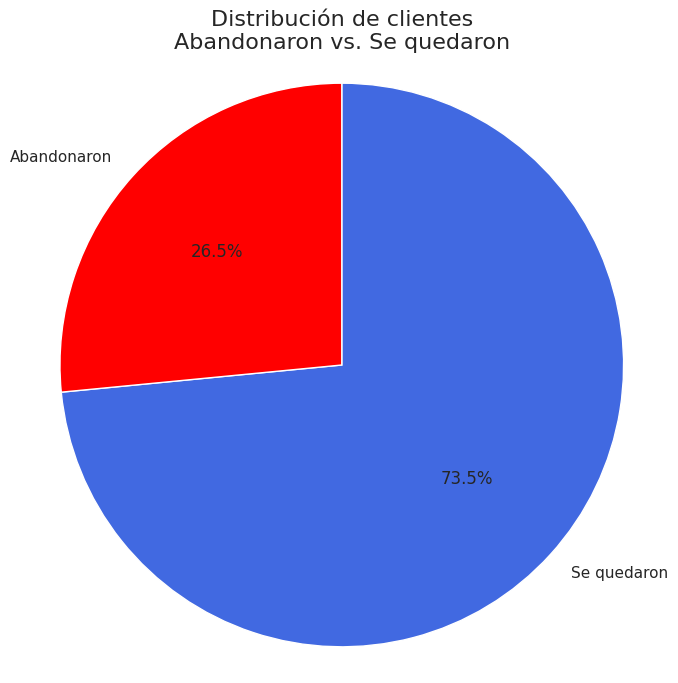

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(
    churn_conteo.values,
    labels=['Se quedaron', 'Abandonaron'],
    colors=['royalblue','red'],

    autopct='%1.1f%%',
    startangle=90,
    counterclock=False,

)
plt.title('Distribución de clientes\nAbandonaron vs. Se quedaron', fontsize=16)
plt.axis('equal')
plt.show()

# Grafica circular por porcentajes unicamente en relación a los clientes que
# abandonaron su relacion con la empresa y los que se quedaron y aún la
# mantienen

Permanecen 1969
Abandonaron 5174

📈📌 **Graficar la información**

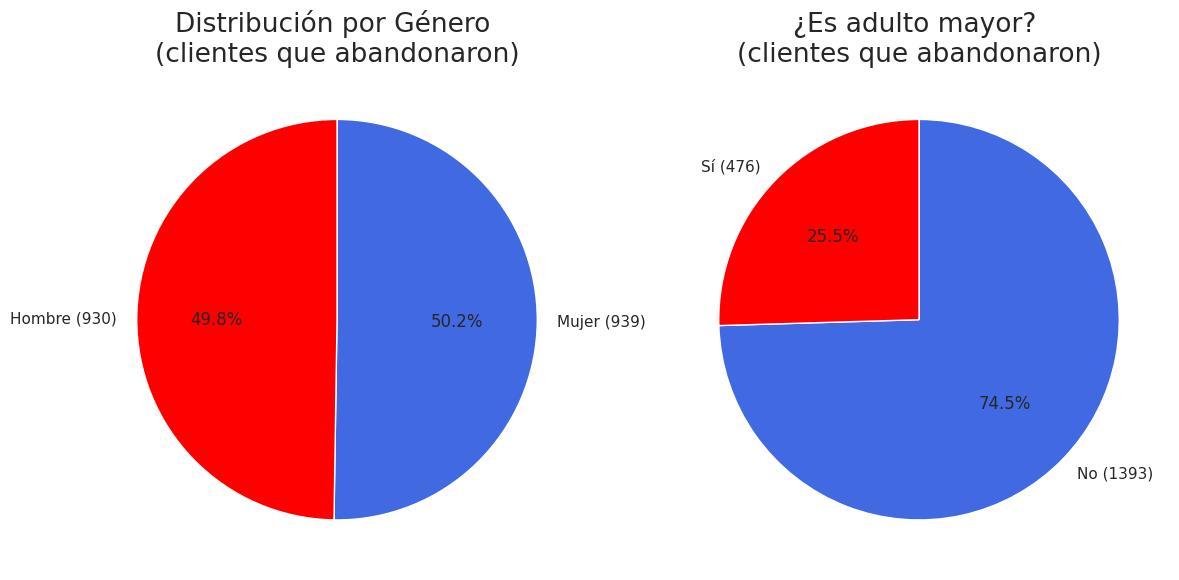

In [ ]:
genero_conteo = clientes_abandonaron_limpio['cliente.género'].value_counts()

adulto_mayor_conteo = clientes_abandonaron_limpio['cliente.Adulto_Mayor'].map({0: 'No', 1: 'Sí'}).value_counts()

fig, axes = plt.subplots(1, 2, figsize = (12, 6))

axes[0].pie(
    genero_conteo,
    labels=[f'{label} ({count})' for label, count in genero_conteo.items()],
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False,
    colors=['royalblue', 'red']
)
axes[0].set_title('Distribución por Género \n(clientes que abandonaron)', fontsize=19)

axes[1].pie(
    adulto_mayor_conteo,
    labels=[f'{label} ({count})' for label, count in adulto_mayor_conteo.items()],
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False,
    colors=['royalblue', 'red']
)
axes[1].set_title('¿Es adulto mayor? \n(clientes que abandonaron)', fontsize=19)

plt.tight_layout()
plt.show()


Seleccionar la columna de interés

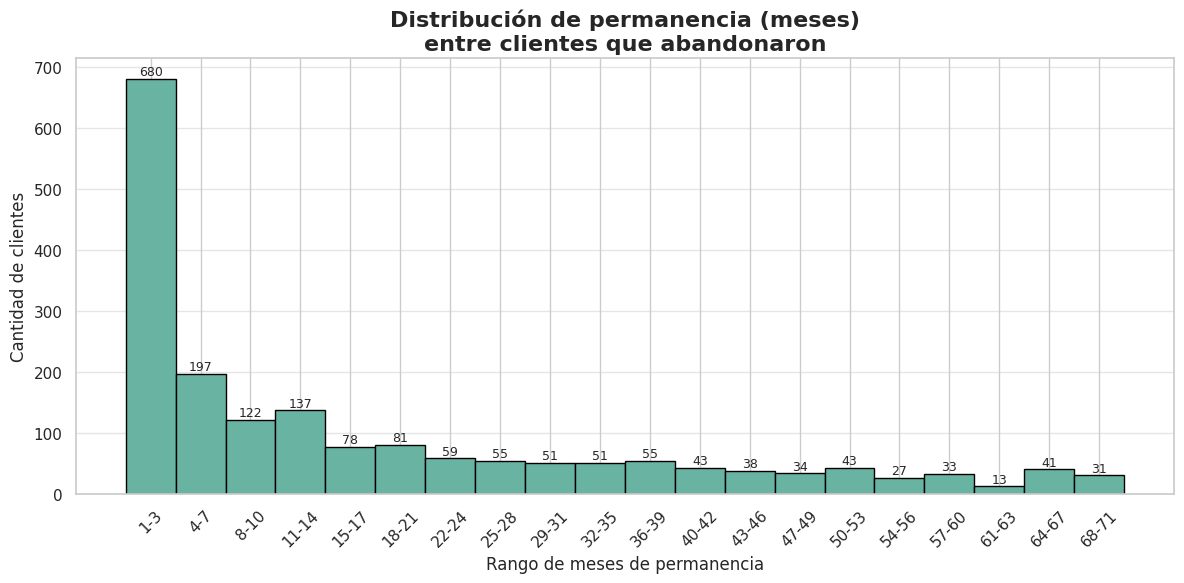

In [ ]:
valores = clientes_abandonaron_limpio['Meses.Contrato']

# Crear figura
plt.figure(figsize=(12, 6))

# Crear histograma y capturar conteo y bordes de bins
conteo, bins, patches = plt.hist(valores, bins=20, edgecolor='black', color='#69b3a2')

# Crear etiquetas para cada barra usando los rangos
etiquetas_rangos = [f"{int(bins[i])}-{int(bins[i+1]-1)}" for i in range(len(bins)-1)]
posiciones = [(bins[i] + bins[i+1]) / 2 for i in range(len(bins)-1)]

# Reemplazar las etiquetas del eje X con los rangos
plt.xticks(ticks=posiciones, labels=etiquetas_rangos, rotation=45)

# Etiquetas sobre las barras
for count, x in zip(conteo, posiciones):
    if count > 0:
        plt.text(x, count + 1, str(int(count)), ha='center', va='bottom', fontsize=9)

# Título y estilo
plt.title('Distribución de permanencia (meses)\nentre clientes que abandonaron', fontsize=16, fontweight='bold')
plt.xlabel('Rango de meses de permanencia', fontsize=12)
plt.ylabel('Cantidad de clientes', fontsize=12)
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

Filtrar los clientes con antigüedad entre 1 y 7 meses

In [ ]:
clientes_abandonaron_7meses = clientes_abandonaron_limpio[
    (clientes_abandonaron_limpio['Meses.Contrato'] >= 1) &
    (clientes_abandonaron_limpio['Meses.Contrato'] <= 7)
].copy()

clientes_abandonaron_7meses.head()

,cliente.género,cliente.Adulto_Mayor,Meses.Contrato,Teléfono.Servicio,Teléfono.Multiples.Lineas,Internet.Servicio,Internet.Seguridad.EnLinea,Internet.Respaldo.EnLinea,Internet.Protección.Dispositivo,Internet.soporte.tecnico,Internet.TV.Cable,Internet.Películas.Streaming,Contrato,Factura.Digital,Método.Pago,Cuentas.Mensuales,Total.facturación,Cuentas.diarias,Cuentas.Prom.Periodo
2,Hombre,0,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,True,Electronic check,73.90,280.85,2.463333,70.212500
4,Mujer,1,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,True,Mailed check,83.90,267.40,2.796667,89.133333
19,Hombre,1,1,No,No,DSL,No,No,No,No,No,No,Month-to-month,True,Electronic check,25.10,25.10,0.836667,25.100000
24,Mujer,0,4,Yes,No,No,No aplica,No aplica,No aplica,No internet service,No aplica,No aplica,Month-to-month,False,Mailed check,20.35,76.35,0.678333,19.087500
25,Mujer,0,1,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,False,Bank transfer (automatic),30.50,30.50,1.016667,30.500000


In [ ]:
clientes_abandonaron_7meses.to_csv('clientes_abandonaron_7meses.csv', index=False)

In [ ]:
# Columnas a analizar
columnas_categorias = [
    'cliente.género',
    'cliente.Adulto_Mayor',
    'Teléfono.Servicio',
    'Teléfono.Multiples.Lineas',
    'Internet.Servicio',
    'Internet.Protección.Dispositivo',
    'Internet.soporte.tecnico',
    'Internet.Películas.Streaming',
    'Contrato',
    'Factura.Digital',
    'Método.Pago'
]

for col in columnas_categorias:
    print(f"\n📊 {col}")
    print(clientes_abandonaron_7meses[col].value_counts(dropna=False))  ## Mostrar conteos de valores por columna


📊 cliente.género
cliente.género
Mujer     428
Hombre    407
Name: count, dtype: int64

📊 cliente.Adulto_Mayor
cliente.Adulto_Mayor
0    666
1    169
Name: count, dtype: int64

📊 Teléfono.Servicio
Teléfono.Servicio
Yes    749
No      86
Name: count, dtype: int64

📊 Teléfono.Multiples.Lineas
Teléfono.Multiples.Lineas
No     612
Yes    223
Name: count, dtype: int64

📊 Internet.Servicio
Internet.Servicio
Fiber optic    500
DSL            254
No              81
Name: count, dtype: int64

📊 Internet.Protección.Dispositivo
Internet.Protección.Dispositivo
No           627
Yes          127
No aplica     81
Name: count, dtype: int64

📊 Internet.soporte.tecnico
Internet.soporte.tecnico
No                     679
No internet service     81
Yes                     75
Name: count, dtype: int64

📊 Internet.Películas.Streaming
Internet.Películas.Streaming
No           539
Yes          215
No aplica     81
Name: count, dtype: int64

📊 Contrato
Contrato
Month-to-month    830
One year            5
Name:

In [ ]:
import pandas as pd
from IPython.display import display

# Definir columnas categóricas
columnas_categoricas = [
    'cliente.género',
    'cliente.Adulto_Mayor',
    'Teléfono.Servicio',
    'Teléfono.Multiples.Lineas',
    'Internet.Servicio',
    'Internet.Seguridad.EnLinea',
    'Internet.Respaldo.EnLinea',
    'Internet.Protección.Dispositivo',
    'Internet.soporte.tecnico',
    'Internet.TV.Cable',
    'Internet.Películas.Streaming',
    'Contrato',
    'Factura.Digital',
    'Método.Pago'
]

# Crear diccionario de comparación
comparacion_cat = {
    col: pd.DataFrame({
        'Clientes que abandonan': clientes_abandonaron_limpio[col].value_counts(normalize=True),
        'Clientes que se quedan': clientes_no_abandonaron[col].value_counts(normalize=True)
    })
    for col in columnas_categoricas
}

# Unir todas las comparaciones
tabla_comparativa_cat = pd.concat(comparacion_cat, axis=0).fillna(0)

# Convertir a porcentaje
tabla_comparativa_cat_pct = tabla_comparativa_cat.map(lambda x: f"{x*100:.1f}%")
tabla_comparativa_cat.style.format("{:.1f}%")

# Mostrar en pantalla
display(tabla_comparativa_cat_pct)


Clientes que abandonan  \
cliente.género                  Female                                      0.0%   
                                Hombre                                     49.8%   
                                Male                                        0.0%   
                                Mujer                                      50.2%   
cliente.Adulto_Mayor            0                                          74.5%   
                                1                                          25.5%   
Teléfono.Servicio               Yes                                        90.9%   
                                No                                          9.1%   
Teléfono.Multiples.Lineas       No                                         54.5%   
                                No phone service                            0.0%   
                                Yes                                        45.5%   
Internet.Servicio               DSL                                        24.6%   
                                Fiber optic                                69.4%   
                                No                                          6.0%   
Internet.Seguridad.EnLinea      No                                         78.2%   
                                No aplica                                   6.0%   
                                No internet service                         0.0%   
                                Yes                                        15.8%   
Internet.Respaldo.EnLinea       No                                         66.0%   
                                No aplica                                   6.0%   
                                No internet service                         0.0%   
                                Yes                                        28.0%   
Internet.Protección.Dispositivo No                                         64.8%   
                                No aplica                                   6.0%   
                                No internet service                         0.0%   
                                Yes                                        29.2%   
Internet.soporte.tecnico        No                                         77.4%   
                                Yes                                        16.6%   
                                No internet service                         6.0%   
Internet.TV.Cable               No                                         50.4%   
                                No aplica                                   6.0%   
                                No internet service                         0.0%   
                                Yes                                        43.6%   
Internet.Películas.Streaming    No                                         50.2%   
                                No aplica                                   6.0%   
                                No internet service                         0.0%   
                                Yes                                        43.8%   
Contrato                        Month-to-month                             88.6%   
                                One year                                    8.9%   
                                Two year                                    2.6%   
Factura.Digital                 1                                          74.9%   
                                0                                          25.1%   
Método.Pago                     Bank transfer (automatic)                  13.8%   
                                Credit card (automatic)                    12.4%   
                                Electronic check                           57.3%   
                                Mailed check                               16.5%   

                                                          Clientes que se quedan  
cliente.género            

Aseguar consistencia en el Analisis:


In [ ]:
clientes_abandonaron_limpio['rango_3Meses'] = pd.cut(
    clientes_abandonaron_limpio['Meses.Contrato'],
    bins=range(1, clientes_abandonaron_limpio['Meses.Contrato'].max() + 4, 3),
    right=True,
    include_lowest=True
)

#Tabla de Frecuencias
tabla_rangos = (
    clientes_abandonaron_limpio['rango_3Meses']
    .value_counts()
    .sort_index()
    .rename("Cantidad de clientes")
    .reset_index()
    .rename(columns={"index": "Rango de antigüedad"})
)
#Calcular acumulado
tabla_rangos['Acumulado'] = tabla_rangos['Cantidad de clientes'].cumsum()

#Porcentajes x rango y acumulado
total_clientes = tabla_rangos['Cantidad de clientes'].sum()
tabla_rangos['% por rango'] = (tabla_rangos['Cantidad de clientes'] / total_clientes * 100).round(1)
tabla_rangos['% Acumulado'] = (tabla_rangos['Acumulado'] / total_clientes * 100).round(1)

#Porcentajes de abandono por trimestre asumiendo 3 meses x3
tabla_rangos['% abandono del trimestre'] = (tabla_rangos['Cantidad de clientes'] / 3 / total_clientes * 100).round(2)

tabla_rangos

,rango_3Meses,Cantidad de clientes,Acumulado,% por rango,% Acumulado,% abandono del trimestre
0,"(0.999, 4.0]",680,680,36.4,36.4,12.13
1,"(4.0, 7.0]",155,835,8.3,44.7,2.76
2,"(7.0, 10.0]",133,968,7.1,51.8,2.37
3,"(10.0, 13.0]",107,1075,5.7,57.5,1.91
4,"(13.0, 16.0]",89,1164,4.8,62.3,1.59
5,"(16.0, 19.0]",69,1233,3.7,66.0,1.23
6,"(19.0, 22.0]",62,1295,3.3,69.3,1.11
7,"(22.0, 25.0]",59,1354,3.2,72.4,1.05
8,"(25.0, 28.0]",40,1394,2.1,74.6,0.71
9,"(28.0, 31.0]",47,1441,2.5,77.1,0.84


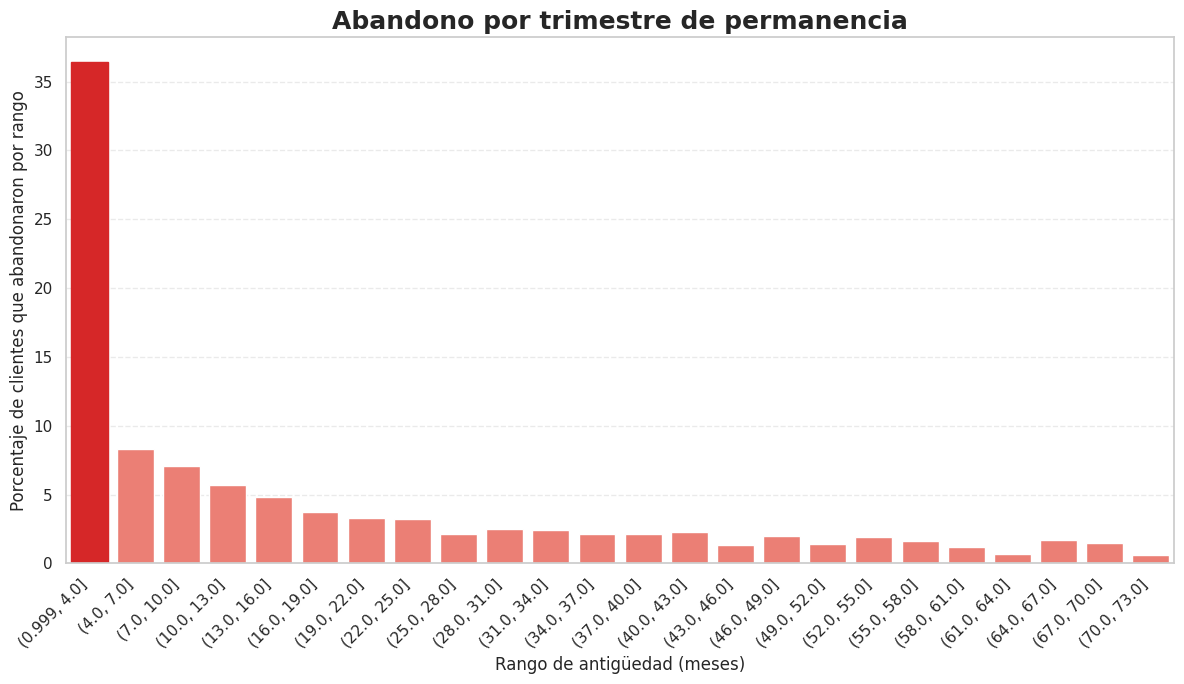

In [ ]:
#Gráfico de barras para destacar el impacto

plt.figure(figsize=(12, 7))
sns.barplot(data=tabla_rangos, x='rango_3Meses', y='% por rango', color='#FF6F61')

# Resaltar el primer trimestre en otro color
bars = plt.gca().patches
for i, bar in enumerate(bars):
    if i == 0:
        bar.set_color('#D62728')  # rojo para el primer trimestre

# Títulos y etiquetas

plt.title('Abandono por trimestre de permanencia', fontsize=18, fontweight='bold')
plt.xlabel('Rango de antigüedad (meses)', fontsize=12)
plt.ylabel('Porcentaje de clientes que abandonaron por rango', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

📊Grafica Distribución de clientes que abandoonaron por tipo de Contrato

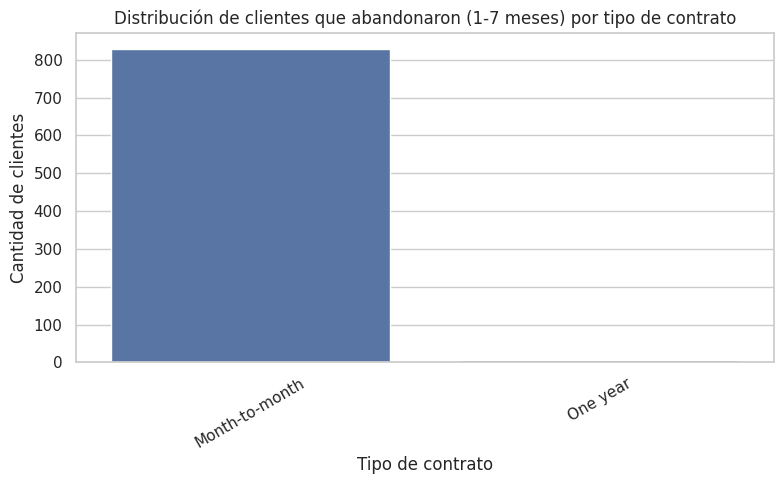

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(
    data=clientes_abandonaron_7meses,
    x='Contrato',
    order=clientes_abandonaron_7meses['Contrato'].value_counts().index
)
plt.title('Distribución de clientes que abandonaron (1-7 meses) por tipo de contrato')
plt.xlabel('Tipo de contrato')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

🧾 **Tipo de Contrato**

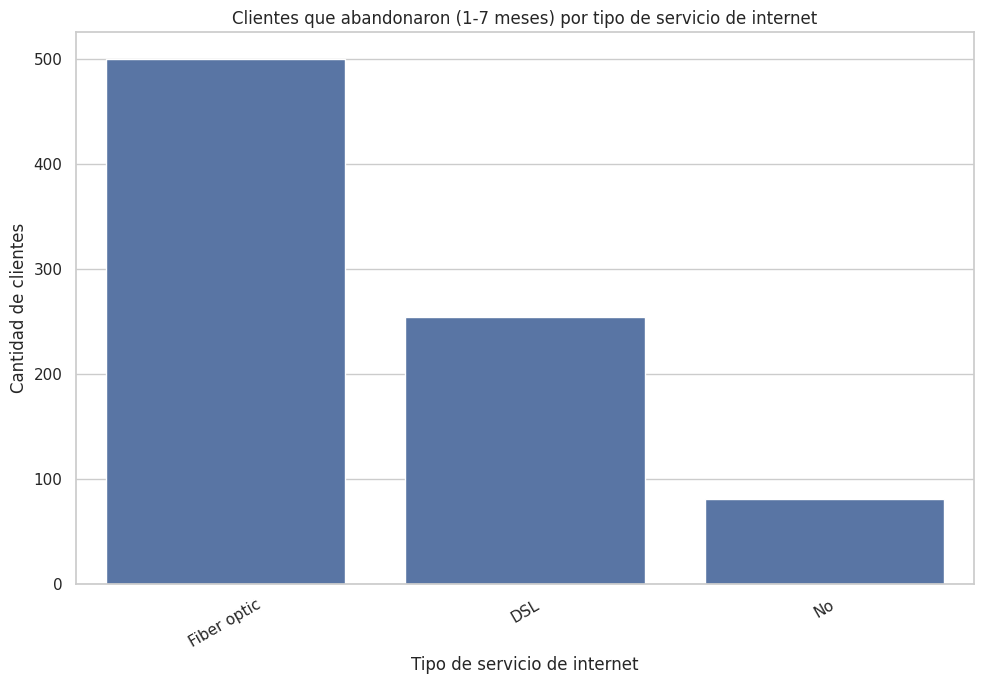

In [ ]:
#Distribución servicio de Internet
plt.figure(figsize=(10, 7))
sns.countplot(
    data=clientes_abandonaron_7meses,
    x='Internet.Servicio',
    order=clientes_abandonaron_7meses['Internet.Servicio'].value_counts().index
)
plt.title('Clientes que abandonaron (1-7 meses) por tipo de servicio de internet')
plt.xlabel('Tipo de servicio de internet')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


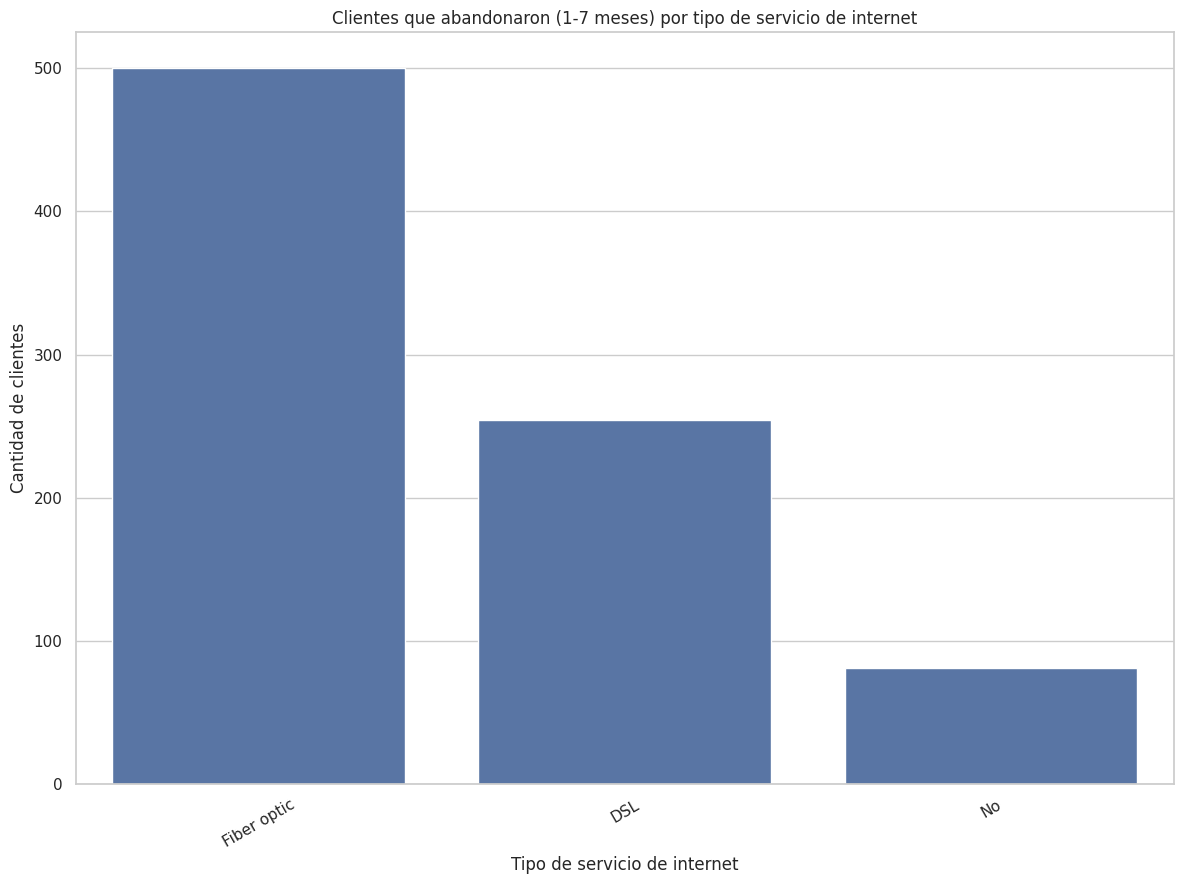

In [ ]:
plt.figure(figsize=(12, 9))
sns.countplot(
    data=clientes_abandonaron_7meses,
    x='Internet.Servicio',
    order=clientes_abandonaron_7meses['Internet.Servicio'].value_counts().index
)
plt.title('Clientes que abandonaron (1-7 meses) por tipo de servicio de internet')
plt.xlabel('Tipo de servicio de internet')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

In [ ]:
columnas_servicios = [
    'Internet.Seguridad.EnLinea',
    'Internet.Respaldo.EnLinea',
    'Internet.Protección.Dispositivo',
    'Internet.soporte.tecnico',
    'Internet.TV.Cable',
    'Internet.Películas.Streaming'
]

/tmp/ipython-input-1721147528.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  servicios_binarios = clientes_abandonaron_7meses[columnas_servicios].replace({


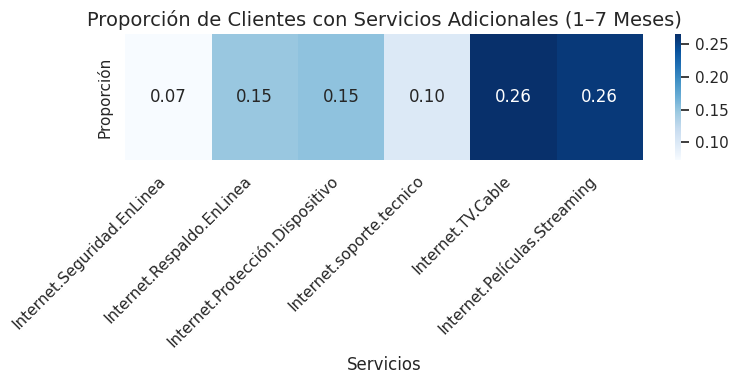

In [ ]:
servicios_binarios = clientes_abandonaron_7meses[columnas_servicios].replace({
    'Yes': 1,
    'No': 0,
    'No aplica': 0,
    True: 1,
    False: 0
})
servicios_binarios = servicios_binarios.apply(pd.to_numeric, errors='coerce')

proporciones = servicios_binarios.mean().to_frame(name='Proporción')

#Heatmap

plt.figure(figsize=(8, 4))
sns.heatmap(proporciones.T, annot=True, cmap='Blues', cbar=True, fmt=".2f")
plt.title('Proporción de Clientes con Servicios Adicionales (1–7 Meses)', fontsize=14)
plt.xlabel('Servicios')
plt.ylabel('')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

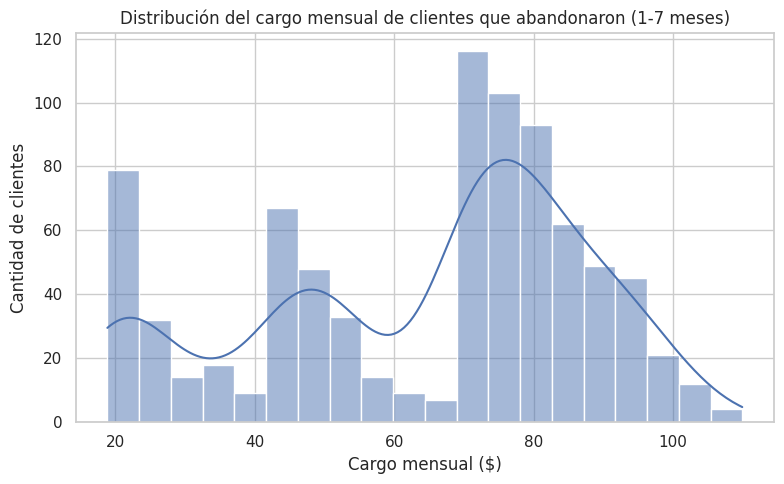

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(
    data=clientes_abandonaron_7meses,
    x='Cuentas.Mensuales',
    bins=20,
    kde=True
)
plt.title('Distribución del cargo mensual de clientes que abandonaron (1-7 meses)')
plt.xlabel('Cargo mensual ($)')
plt.ylabel('Cantidad de clientes')
plt.tight_layout()
plt.show()

📰📌📌  **INFORME FINAL**

📈 Análisis de Abandono de Clientes (1–7 Meses)


**🧾 Descripción del Proyecto**
Este proyecto explora las razones por las cuales los clientes cancelan su servicio dentro de los primeros meses. A través del análisis de datos, se identifican patrones comunes que ayudan a entender mejor el comportamiento del cliente y proponer acciones para mejorar la retención.

**🛠️ Herramientas utilizadas**
Python (Pandas, Matplotlib, Seaborn)
Jupyter Notebook
Google Colab
Git & GitHub

**🚀 ¿Cómo ejecutar el proyecto?**
Puedes correr este análisis directamente en Google Colab, sin necesidad de instalar nada en tu computadora. Solo sigue estos pasos:

Abre el notebook en Colab haciendo clic aquí:
👉 Abrir en Google Colab

Una vez abierto, selecciona Archivo > Guardar una copia en Drive para trabajar sobre tu propia versión.

Ejecuta las celdas en orden para ver el análisis completo, gráficos y conclusiones.

**🔍 Principales hallazgos**
Contratos mensuales: Los clientes con contratos sin permanencia tienden a cancelar más rápido.
Fibra óptica: Aunque es un servicio premium, su costo no siempre se justifica si no hay valor percibido.
Pago manual: El uso de cheques electrónicos se relaciona con menor fidelización.
Servicios adicionales: Los clientes que no contratan extras como soporte o entretenimiento muestran menor vínculo con la empresa.
Precio mensual: Rangos entre $60 y $90 sin beneficios claros pueden generar cancelaciones.

**📌 Conclusiones**
Los abandonos tempranos se deben principalmente a:

Falta de estrategias de retención en los primeros meses.
Contratos sin compromiso.
Precios altos sin valor añadido.
Métodos de pago que reflejan bajo involucramiento.

**✅ Recomendaciones**
Implementar programas de bienvenida y seguimiento en los primeros 90 días.
Ofrecer beneficios por contratos a largo plazo.
Incluir servicios adicionales que aumenten el valor percibido.
Promover pagos automáticos para mejorar la permanencia.